# Capstone module 3: Machine Learning

## Data: Bank Marketing Campaign

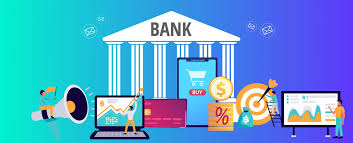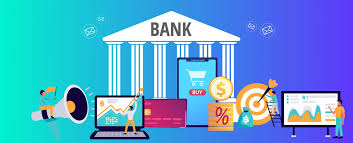

## Context Business
Bank ingin meningkatkan efektivitas kampanye pemasaran untuk produk deposito berjangka dengan memprediksi apakah seorang nasabah akan membuka deposito tersebut. Dengan menggunakan data historis, bank dapat memanfaatkan model prediktif untuk menargetkan nasabah yang paling potensial, sehingga mengurangi biaya kampanye dan meningkatkan konversi.

**Tujuan Model:** Membangun model klasifikasi untuk memprediksi keputusan nasabah membuka deposito (deposit: Yes/No) berdasarkan data demografi, keuangan, dan riwayat interaksi kampanye.

**Dampak:**

Efisiensi pemasaran meningkat dengan fokus pada nasabah potensial.

Penghematan biaya dan peningkatan pendapatan melalui strategi berbasis data.

**Target:**

0 : Tidak membuka Deposito Berjangka

1 : Membuka Deposito Berjangka

## Problem Statement

Bank menghadapi tantangan dalam meningkatkan efektivitas kampanye pemasaran deposito berjangka. Saat ini, upaya pemasaran bersifat luas dan kurang terarah, sehingga menyebabkan biaya operasional yang tinggi dan tingkat konversi yang rendah.

Tujuan dari proyek ini adalah membangun model prediksi berbasis data untuk mengidentifikasi nasabah yang kemungkinan besar akan membuka deposito berjangka. Dengan demikian, bank dapat:

1. Menargetkan nasabah potensial secara lebih efisien.

2. Mengurangi upaya pemasaran yang tidak produktif.

3. Meningkatkan tingkat konversi kampanye.

Model ini akan memanfaatkan data historis demografi, status keuangan, dan interaksi kampanye untuk memberikan wawasan berbasis data yang mendukung pengambilan keputusan strategis.

## Goals

Utama:

1. Membangun model prediksi berbasis machine learning untuk mengklasifikasikan apakah seorang nasabah akan membuka deposito berjangka (deposit: Yes/No).

Tambahan:

2. Mengidentifikasi faktor-faktor utama yang memengaruhi keputusan nasabah, seperti demografi, status keuangan, atau riwayat interaksi pemasaran.
3. Memberikan rekomendasi strategi pemasaran berbasis segmentasi nasabah untuk meningkatkan efisiensi dan efektivitas kampanye.

Hasil yang Diharapkan:

Akurasi Model: Model dengan metrik evaluasi (seperti F1-score, precision, atau recall) yang optimal untuk mendukung keputusan bisnis.

Efisiensi Operasional: Pengurangan biaya kampanye dengan menargetkan nasabah yang lebih potensial.

Peningkatan Konversi: Penambahan persentase nasabah yang membuka deposito berjangka dibandingkan metode pemasaran sebelumnya.

## Analytic Approach

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan kandidat yang membuka deposito berjangka panjang dan yang tidak membuka Deposito Berjangka.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang kandidat akan/ingin bekerja di perusahaan tersebut atau tidak.

## Import Library

In [5]:
# untuk manipulasi data, analisis, dan visualisasi.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# untuk encoding, scaling, imputing, dan transformasi data.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA

# untuk split data, memilih model, cross-validation, dan evaluasi model.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# untuk membangun model dan menangani ketidakseimbangan data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy import stats

# Load Data

In [8]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head(10)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes
7,36,technician,911,yes,yes,cellular,may,2,21,failure,yes
8,35,management,805,no,no,cellular,sep,1,-1,unknown,no
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,no


In [10]:
# Konversi nilai 'yes' dan 'no' pada kolom 'deposit' menjadi bentuk numerik dengan np.where
df['deposit'] = np.where(df['deposit'] == 'yes', 1, 0)
df.head(10)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,0
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1
8,35,management,805,no,no,cellular,sep,1,-1,unknown,0
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,0


### Penjelasan Kolom

| Kolom                                    | Deskripsi                                                                                 |
|------------------------------------------|-------------------------------------------------------------------------------------------|
| **age (usia)**                           | Usia pelanggan.                                                                           |
| **job (pekerjaan)**                      | Jenis pekerjaan pelanggan.                                                                |
| **balance (saldo)**                      | Saldo rekening bank pelanggan.                                                            |
| **housing (rumah)**                      | Apakah pelanggan memiliki rumah atau tidak (yes = ya, no = tidak).                        |
| **loan (pinjaman)**                      | Apakah pelanggan memiliki pinjaman atau tidak (yes = ya, no = tidak).                     |
| **contact (kontak)**                     | Jenis komunikasi yang digunakan untuk menghubungi pelanggan (misalnya, melalui telepon atau seluler). |
| **month (bulan)**                        | Bulan terakhir pelanggan dihubungi.                                                       |
| **campaign (kampanye)**                  | Jumlah kontak yang dilakukan selama kampanye ini untuk pelanggan tersebut.                |
| **pdays (hari)**                         | Jumlah hari setelah pelanggan dihubungi dari kampanye sebelumnya. Nilai -1 menunjukkan bahwa pelanggan tidak dihubungi dalam kampanye sebelumnya. |
| **poutcome (hasil kampanye sebelumnya)** | Hasil dari kampanye pemasaran sebelumnya (misalnya, berhasil atau tidak berhasil).        |
| **deposit (deposito)**                   | Apakah pelanggan melakukan deposito atau tidak (yes = ya, no = tidak).                    |

# Informasi Feature/Data Understanding

### Spliting dataset menjadi **df_train** dan **df_test**

In [16]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['deposit'])

#### Insights

Melakukan Split setelah load dataset untuk menghindari Data Leakage,membantu mencegah kebocoran informasi dari data pengujian ke dalam data pelatihan, yang dapat menyebabkan evaluasi yang bias.

### Melihat tipe data tiap kolom

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6250 entries, 1459 to 2303
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       6250 non-null   int64 
 1   job       6250 non-null   object
 2   balance   6250 non-null   int64 
 3   housing   6250 non-null   object
 4   loan      6250 non-null   object
 5   contact   6250 non-null   object
 6   month     6250 non-null   object
 7   campaign  6250 non-null   int64 
 8   pdays     6250 non-null   int64 
 9   poutcome  6250 non-null   object
 10  deposit   6250 non-null   int32 
dtypes: int32(1), int64(4), object(6)
memory usage: 561.5+ KB


Dataset memiliki:
- 4 kolom integer
- 6 kolom string/object -> sebelum melakukan nilai 'yes' dan 'no' pada kolom 'deposit' menjadi bentuk numerik dengan np.where

### Melihat sebaran data tiap kolom

In [22]:
df_train.describe()

,age,balance,campaign,pdays,deposit
count,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,41.224800,1507.599360,2.513760,51.525120,0.477600
std,11.899612,3028.937658,2.713778,108.577223,0.499538
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,129.250000,1.000000,-1.000000,0.000000
50%,39.000000,556.000000,2.000000,-1.000000,0.000000
75%,49.000000,1693.000000,3.000000,48.000000,1.000000
max,95.000000,52587.000000,63.000000,854.000000,1.000000


In [24]:
df_train.shape

(6250, 11)

### Melihat baris yang duplikat

In [27]:
# Mengidentifikasi baris duplikat
duplicate_rows = df_train[df_train.duplicated(keep=False)]

# Mengurutkan baris duplikat berdasarkan kolom 'age' dan 'job'
duplicate_rows_sorted = duplicate_rows.sort_values(by=['age', 'job'])

print(f"Jumlah baris duplikat: {duplicate_rows_sorted.duplicated().sum()}")

# Menampilkan baris duplikat yang sudah diurutkan
pd.DataFrame(duplicate_rows_sorted)

Jumlah baris duplikat: 5


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2486,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,1
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,1
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,0
330,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,0
3073,41,management,0,no,no,cellular,aug,2,-1,unknown,0
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,0
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,0
4935,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,0
1948,60,management,0,no,no,cellular,aug,3,-1,unknown,1
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,1


### Pengecekan Missing Value

In [30]:
missing_values = df_train.isnull().sum()

# Menampilkan hasil pengecekan missing value
pd.DataFrame({'Data Kosong Pada Setiap Kolom' : missing_values})

,Data Kosong Pada Setiap Kolom
age,0
job,0
balance,0
housing,0
loan,0
contact,0
month,0
campaign,0
pdays,0
poutcome,0


### Menampilkan jumlah nilai distinct (unik) di setiap kolom

In [33]:
distinct_values = df_train.nunique()

pd.DataFrame({'Unique Data Setiap Kolom' : distinct_values})

,Unique Data Setiap Kolom
age,75
job,12
balance,2800
housing,2
loan,2
contact,3
month,12
campaign,30
pdays,399
poutcome,4


### Menampilkan nilai unik di setiap kolom

In [36]:
all_unique_values_list = []

# Menambahkan nilai unik ke dalam DataFrame
for col in df_train.columns:
    unique_values = df_train[col].unique()
    unique_values_str = ', '.join(map(str, unique_values))
    unique_values_count = len(unique_values)
    all_unique_values_list.append({"Column": col, "Unique Values": unique_values_str, "Count": unique_values_count})

# Membuat DataFrame dari list
all_unique_values_df_train = pd.DataFrame(all_unique_values_list)

# Mengatur tampilan untuk memastikan semua nilai terlihat
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Menampilkan DataFrame
pd.DataFrame(all_unique_values_df_train)

Column  \
0        age   
1        job   
2    balance   
3    housing   
4       loan   
5    contact   
6      month   
7   campaign   
8      pdays   
9   poutcome   
10   deposit   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## Kolom Numerikal

### Visualisasi sebaran data kolom numerik

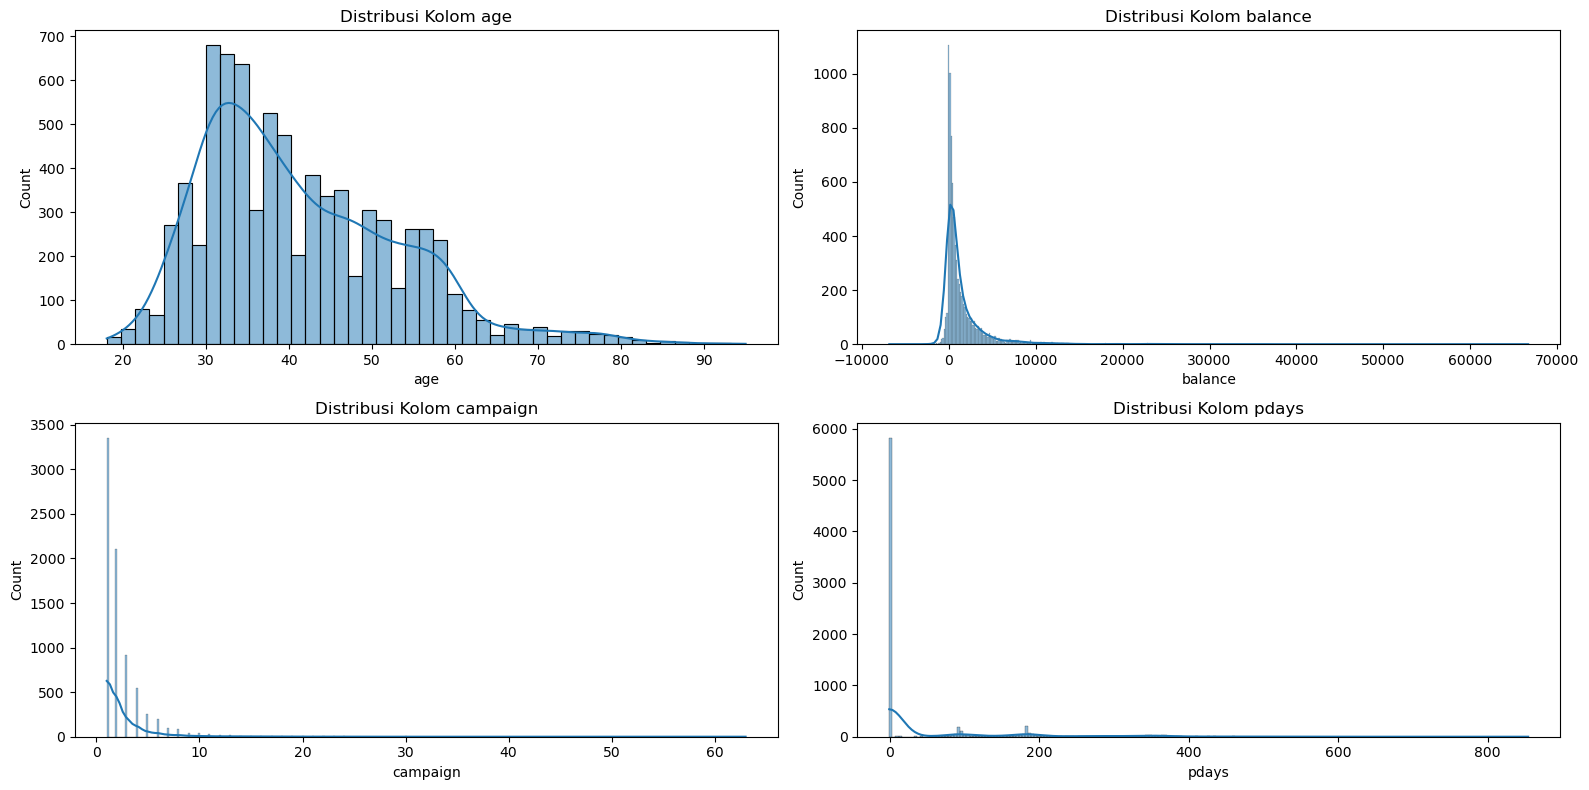

In [40]:
# Menentukan kolom numerik
numerical_cols = ['age', 'balance', 'campaign', 'pdays']

# Plot histogram untuk mengecek distribusi
plt.figure(figsize=(16, 8))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi Kolom {col}')

plt.tight_layout()
plt.show()

### Visualisasi outlier

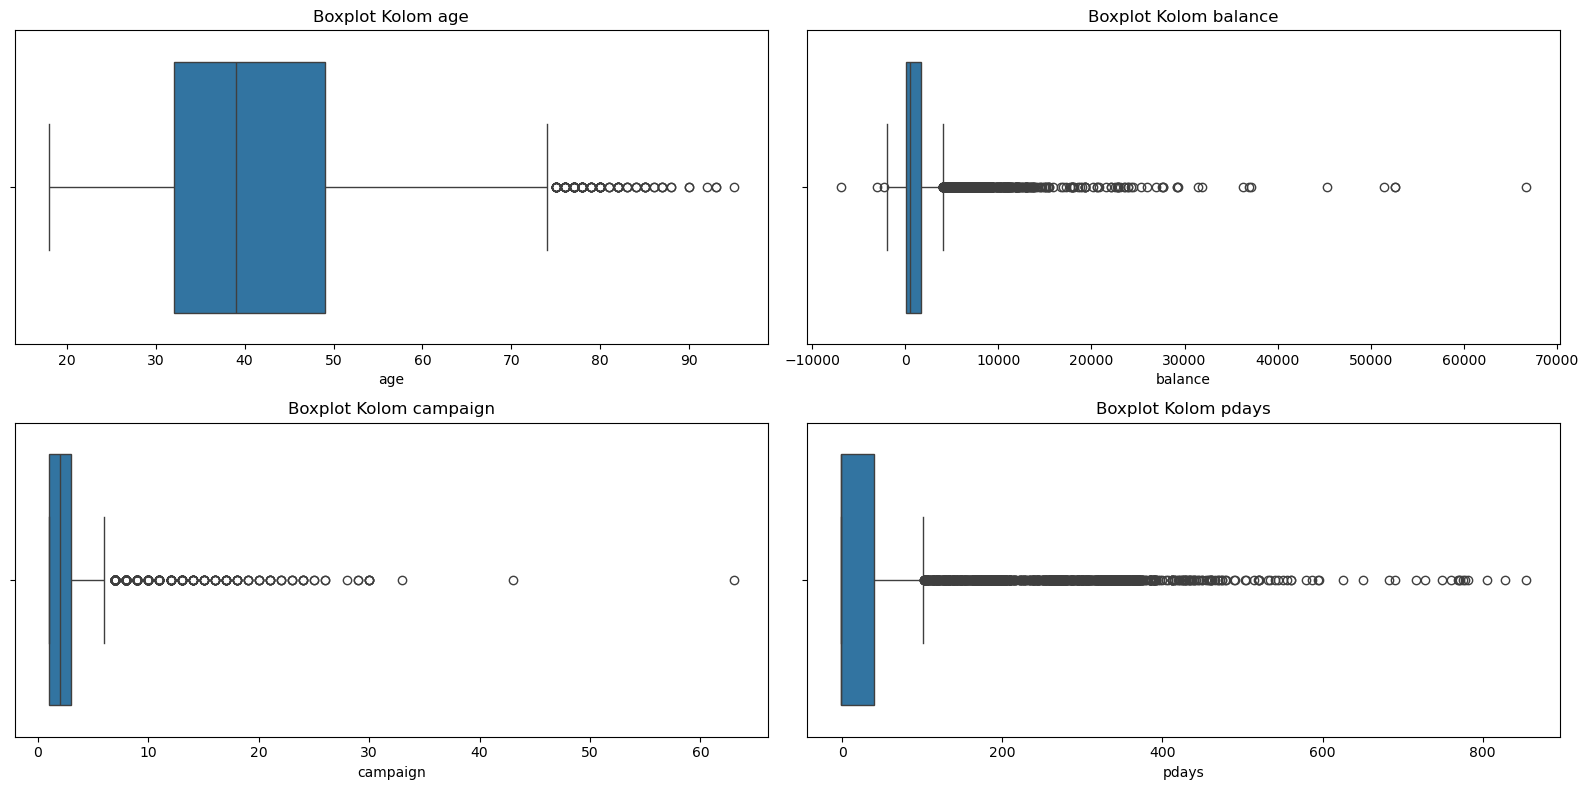

In [43]:
# Plot boxplot untuk mengecek outlier
plt.figure(figsize=(16, 8))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot Kolom {col}')

plt.tight_layout()
plt.show()

### Pengecekan Outlier dengan IQR

In [46]:
# Fungsi untuk menghitung jumlah dan persentase outlier
def detect_outliers(df_train, col):
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_percentage = (outliers_count / df_train.shape[0]) * 100
    return outliers_count, f'{outliers_percentage:.2f}%'

# Menghitung dan menampilkan jumlah dan persentase outlier untuk setiap kolom numerik
outlier_summary = {}
for col in numerical_cols:
    outlier_count, outlier_percentage = detect_outliers(df_train, col)
    outlier_summary[col] = {'Jumlah Outlier': outlier_count, 'Persentase Outlier': outlier_percentage}

# Menampilkan hasil
outlier_summary_df = pd.DataFrame(outlier_summary).T
pd.DataFrame(outlier_summary_df)

,Jumlah Outlier,Persentase Outlier
age,96,1.54%
balance,578,9.25%
campaign,341,5.46%
pdays,1087,17.39%


### Uji Multikolinearitas

In [49]:
# Menghitung matriks korelasi antara fitur numerik
numerical_cols_corr = ['age', 'balance', 'campaign', 'pdays', 'deposit']
correlation_matrix = df_train[numerical_cols_corr].corr(method = 'spearman')

# Menampilkan matriks korelasi
print("Matriks Korelasi Antara Fitur Numerik:")
pd.DataFrame(correlation_matrix)

Matriks Korelasi Antara Fitur Numerik:


,age,balance,campaign,pdays,deposit
age,1.000000,0.089671,0.025273,0.009925,0.003312
balance,0.089671,1.000000,-0.022990,0.094270,0.151021
campaign,0.025273,-0.022990,1.000000,-0.132056,-0.122151
pdays,0.009925,0.094270,-0.132056,1.000000,0.210163
deposit,0.003312,0.151021,-0.122151,0.210163,1.000000


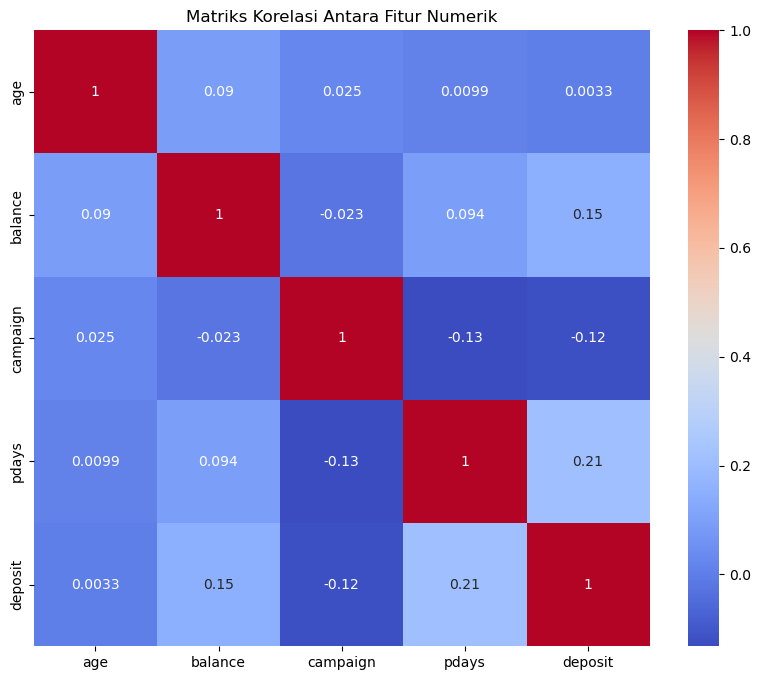

In [51]:
# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Matriks Korelasi Antara Fitur Numerik")
plt.show()

## Kolom Kategorikal

In [54]:
# Mengambil kolom kategorik
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Membuat DataFrame untuk menyimpan nilai unik
unique_values_list = []

# Menambahkan nilai unik ke dalam DataFrame
for col in categorical_cols:
    unique_values = df_train[col].unique()
    unique_values_str = ', '.join(map(str, unique_values))
    unique_values_count = len(unique_values)
    unique_values_list.append({"Column": col, "Unique Values": unique_values_str, "Count": unique_values_count})

# Membuat DataFrame dari list
unique_values_df_train = pd.DataFrame(unique_values_list)

# Mengatur tampilan untuk memastikan semua nilai terlihat
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# Menampilkan DataFrame
pd.DataFrame(unique_values_df_train)

,Column,Unique Values,Count
0,job,"management, technician, admin., services, entrepreneur, student, blue-collar, retired, housemaid, self-employed, unknown, unemployed",12
1,housing,"yes, no",2
2,loan,"no, yes",2
3,contact,"cellular, unknown, telephone",3
4,month,"may, apr, sep, jun, nov, aug, jul, oct, dec, mar, jan, feb",12
5,poutcome,"failure, unknown, other, success",4


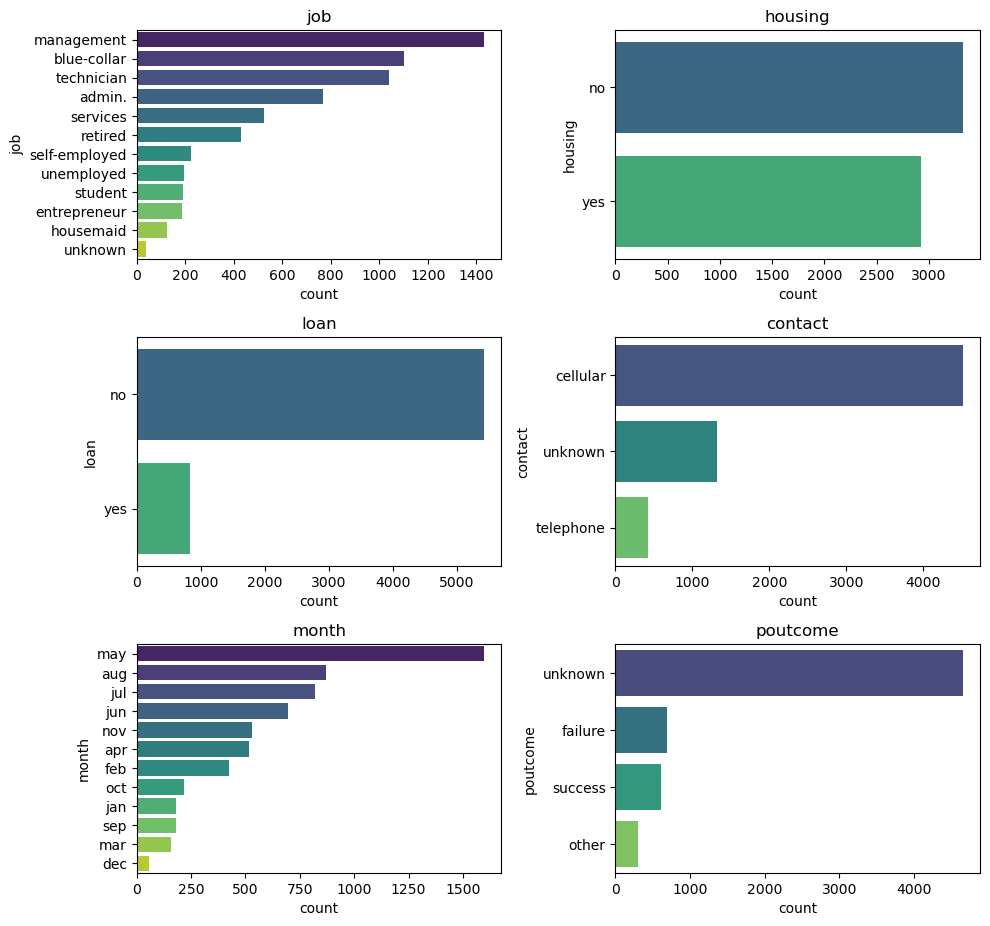

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

count = 0
fig = plt.figure(figsize=(10, 12))

# Looping untuk setiap kolom kategorikal dalam categorical_cols
for kolom in categorical_cols:
    count += 1
    plt.subplot(4, 2, count)  # Mengatur subplot dengan 4 baris dan 2 kolom
    sns.countplot(y=kolom, 
                  data=df_train,  # Menggunakan df_train untuk plot distribusi dalam train set
                  order=df_train[kolom].value_counts().sort_values(ascending=False).index, 
                  palette='viridis')  # Menggunakan skema warna viridis
    plt.title(kolom, fontsize=12)
    fig.tight_layout()

plt.show()

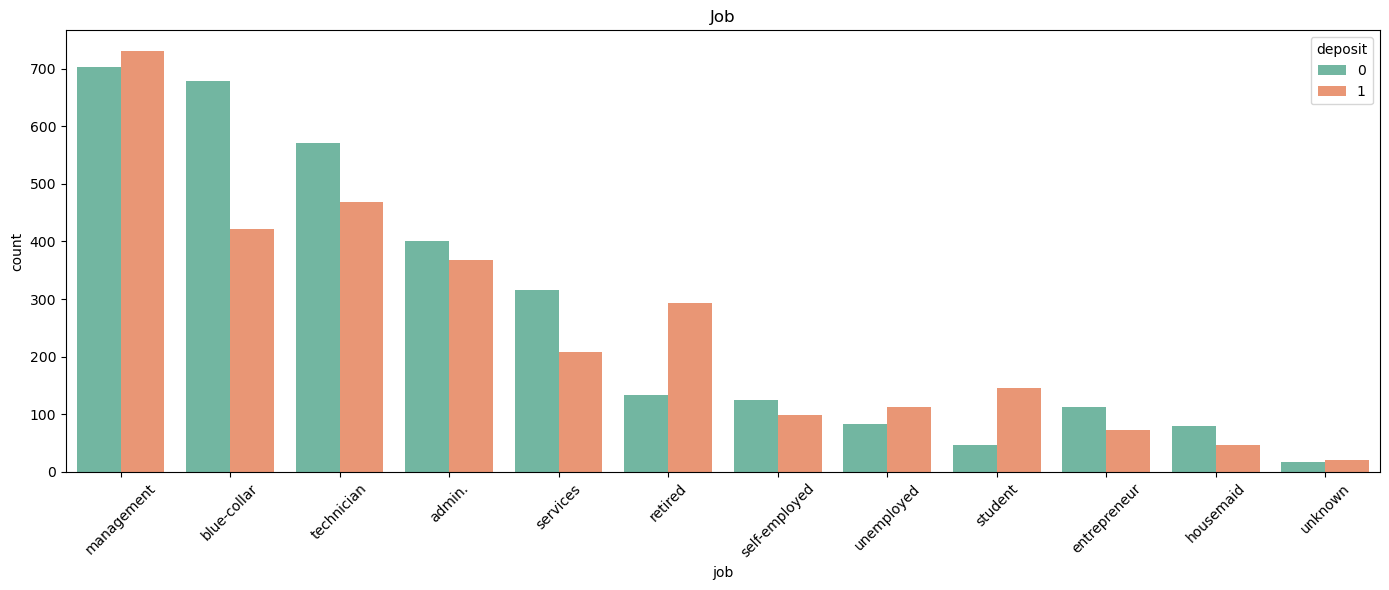

In [58]:
plt.figure(figsize=(14, 6))
sns.countplot(x=df_train['job'], 
              data=df_train, 
              order=df_train['job'].value_counts().sort_values(ascending=False).index, 
              hue='deposit',
              palette='Set2')  # Menggunakan palet warna 'Set2'
plt.title('Job', fontsize=12)
plt.xticks(rotation=45)  # Rotasi label sumbu x untuk meningkatkan kejelasan
plt.tight_layout()
plt.show()

In [60]:
# Fungsi untuk menghitung jumlah dan persentase
def calculate_value_counts_and_percentages(df_train, column):
    value_counts = df_train[column].value_counts()
    percentages = df_train[column].value_counts(normalize=True) * 100
    percentages = percentages.round(2).astype(str) + '%'
    result = pd.DataFrame({'Jumlah': value_counts, 'Persentase': percentages})
    return result

# Menghitung jumlah dan persentase pada kolom 'campaign'
job_stats = calculate_value_counts_and_percentages(df_train, 'job')
pd.DataFrame(job_stats)

,Jumlah,Persentase
job,,
management,1432,22.91%
blue-collar,1100,17.6%
technician,1039,16.62%
admin.,768,12.29%
services,523,8.37%
retired,428,6.85%
self-employed,222,3.55%
unemployed,196,3.14%
student,192,3.07%


In [62]:
# Menghitung jumlah dan persentase pada kolom 'campaign'
contact_stats = calculate_value_counts_and_percentages(df_train, 'contact')
pd.DataFrame(contact_stats)

,Jumlah,Persentase
contact,,
cellular,4509,72.14%
unknown,1313,21.01%
telephone,428,6.85%


In [64]:
# Menghitung jumlah dan persentase pada kolom 'poutcome'
poutcome_stats = calculate_value_counts_and_percentages(df_train, 'poutcome')
pd.DataFrame(poutcome_stats)

,Jumlah,Persentase
poutcome,,
unknown,4650,74.4%
failure,695,11.12%
success,607,9.71%
other,298,4.77%


In [81]:
# Mengubah nilai "unknown" menjadi "not_contacted" pada kolom "poutcome"
df_train['poutcome'] = df_train['poutcome'].replace('unknown', 'not_contacted')
pd.DataFrame(poutcome_stats)

,Jumlah,Persentase
poutcome,,
unknown,4650,74.4%
failure,695,11.12%
success,607,9.71%
other,298,4.77%


### Mengecek distribusi kelas target

Jumlah kelas:
deposit
0    3265
1    2985
Name: count, dtype: int64

Persentase kelas:
deposit
0    52.24
1    47.76
Name: proportion, dtype: float64



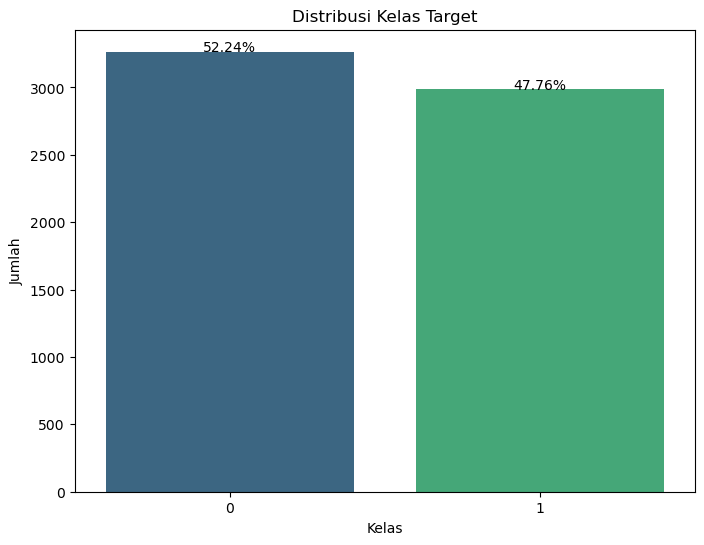

In [66]:
class_counts = df_train['deposit'].value_counts()
class_percentages = df_train['deposit'].value_counts(normalize=True) * 100

print(f"Jumlah kelas:\n{class_counts}\n")
print(f"Persentase kelas:\n{class_percentages}\n")

# Membuat DataFrame untuk visualisasi
class_distribution = pd.DataFrame({'count': class_counts, 'percentage': class_percentages})

# Visualisasi distribusi kelas target
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution['count'], palette='viridis')
for index, row in class_distribution.iterrows():
    plt.text(index, row['count'], f"{row['percentage']:.2f}%", color='black', ha="center")
plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

## Data Preprocessing

### Feature Engineering: 
- **Membangun ColumnTransformer yang akan menerapkan MinMaxScaler pada kolom numerik dan OneHotEncoder pada kolom kategorikal. Kolom numerik akan dinormalisasi ke rentang 0-1, sementara kolom kategorikal akan diubah menjadi beberapa kolom biner. remainder='passthrough' berarti kolom yang tidak ditransformasi akan tetap dipertahankan.**

In [73]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Identify which columns are numerical and which are categorical
numerical_columns = []
categorical_columns = ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type', 'continent']

# Define the transformer
transformer = ColumnTransformer([
    # Apply Min-Max scaling to numerical columns (if any)
    ('min_max_scaler', MinMaxScaler(), numerical_columns),
    
    # Apply one-hot encoding to categorical columns
    ('onehot', OneHotEncoder(drop='first'), categorical_columns)
], remainder='passthrough')

# Display the transformer
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(), []),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['market_segment', 'deposit_type',
                                  'customer_type', 'reserved_room_type',
                                  'continent'])])

## Modeling

### Split df_train

In [83]:
# define fetures and target
X = df_train.drop(['deposit'], axis = 1)
y = df_train['deposit']

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
7267,30,admin.,305,no,no,cellular,apr,1,85,success
7727,56,management,405,no,no,cellular,jul,2,-1,not_contacted
4471,54,blue-collar,1636,no,no,telephone,jul,2,-1,not_contacted
3344,29,technician,1612,yes,no,unknown,may,2,-1,not_contacted
7403,50,technician,570,no,no,unknown,jun,3,-1,not_contacted


In [91]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd

categorical_cols = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_cols = ['age', 'balance', 'campaign', 'pdays']

# Define the transformer
transformer = ColumnTransformer([
    # Apply Min-Max scaling to numerical columns
    ('num', MinMaxScaler(), numerical_cols),
    
    # Apply one-hot encoding to categorical columns
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Define models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)

# Define resampling methods
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
near = NearMiss()

# Dictionary of models
models = {
    'KNN': knn,
    'Logistic Regression': logreg,
    'Decision Tree': tree,
    'XGBoost': xgb,
    'Random Forest': rf,
    'Gradient Boosting': gboost,
}

# Dictionary of resampling methods
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
}

# Dictionary of metrics
metrics = {
    'balanced_accuracy': 'balanced_accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Lists to store results
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# Iterate over all models and resampling methods
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample is None:
            estimator = Pipeline([
                ('transform', transformer),
                ('model', model),
            ])
        else:
            estimator = ImbPipeline([
                ('transform', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)

        # Cross-validation
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)

# Create a DataFrame for benchmarking results
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr
})

# Display the benchmarking results
model_bench

,model,resample,accuracy,precision,recall,F1
0,KNN,none,66.793457,67.600600,60.025681,63.560610
1,Logistic Regression,none,69.525168,74.247182,57.393192,64.697543
2,Decision Tree,none,63.579532,61.856943,62.655200,62.231394
3,XGBoost,none,69.053802,70.295946,62.321870,66.053054
4,Random Forest,none,69.425631,70.860368,62.489933,66.396713
5,Gradient Boosting,none,71.882702,77.209940,60.150855,67.550949
6,KNN,ros,66.238992,66.083884,61.487845,63.672155
7,Logistic Regression,ros,69.202981,71.725719,60.317258,65.487928
8,Decision Tree,ros,62.586944,61.024813,60.860492,60.933892
9,XGBoost,ros,69.514340,70.362533,63.742280,66.870146


**1. Gradient Boosting dengan Resampling SMOTE:**

Secara umum, metode Gradient Boosting dengan teknik resampling SMOTE memberikan performa terbaik dengan nilai F1 mencapai 68.3462.

Hal ini menunjukkan bahwa teknik SMOTE efektif dalam menangani ketidakseimbangan data untuk model ini.

**2. Resampling Techniques:**

Teknik resampling seperti SMOTE dan Near Miss secara konsisten meningkatkan F1-score dibandingkan model yang tidak menggunakan resampling.

Misalnya, model Random Forest:

Tanpa resampling: F1 = 63.3967.

Dengan SMOTE: F1 = 66.5487.

**3. Model Comparison:**

Gradient Boosting memiliki performa terbaik dibandingkan model lain di hampir semua teknik resampling.

Logistic Regression sering kali memberikan hasil yang lebih rendah dalam F1 dibandingkan metode seperti Gradient Boosting atau Random Forest.

In [95]:
model_bench.sort_values('F1', ascending=False).head()

,model,resample,accuracy,precision,recall,F1
29,Gradient Boosting,near miss,71.694458,74.676157,63.073873,68.346258
17,Gradient Boosting,rus,71.656059,74.660151,63.074659,68.313291
23,Gradient Boosting,smote,71.434178,74.077425,63.283340,68.191371
11,Gradient Boosting,ros,71.297576,74.504709,62.280990,67.776288
5,Gradient Boosting,none,71.882702,77.209940,60.150855,67.550949


In [117]:
# Define the transformer
transformer = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Define resampling method (example with SMOTE)
smote = SMOTE(random_state=42)

# Define Gradient Boosting model
gboost = GradientBoostingClassifier(random_state=42)

# Pipeline with resampling and model
pipe_model = ImbPipeline([
    ('transform', transformer),
    ('resampling', smote),  # Example with SMOTE, change as needed
    ('model', gboost)
])

# Assume best_params from first tuning
best_learning_rate = best_params['model__learning_rate']
best_n_estimators = best_params['model__n_estimators']
best_max_depth = best_params['model__max_depth']

# Refined hyperparameter space
refined_hyperparam_space = {
    'model__learning_rate': [best_learning_rate / 2, best_learning_rate, best_learning_rate * 2],
    'model__n_estimators': [best_n_estimators - 50, best_n_estimators, best_n_estimators + 50],
    'model__max_depth': [best_max_depth - 1, best_max_depth, best_max_depth + 1]
}

# Define refined Grid Search
refined_gridsearch = GridSearchCV(
    estimator=pipe_model,
    param_grid=refined_hyperparam_space,
    cv=5,
    scoring='f1',  # Use F1 score for evaluation
    n_jobs=-1
)

# Fit Grid Search
refined_gridsearch.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters found: ", refined_gridsearch.best_params_)
print("Best F1 Score found: {:.2f}".format(refined_gridsearch.best_score_ * 100))

# Assigning the best found model during the 2nd grid search
gboost_tuned = refined_gridsearch.best_estimator_

# Fit the best model on the training data
gboost_tuned.fit(X_train, y_train)

Best Parameters found:  {'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 150}
Best F1 Score found: 68.56


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('resampling', SMOTE(random_state=42)),
                ('model',
                 GradientBoostingClassifier(max_depth=2, n_estimators=150,
                                            random_state=42))])

In [170]:
# Assigning the best found model during the 1st grid search

gb_tuning = gridsearch.best_estimator_
gb_tuning.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('model',
                 GradientBoostingClassifier(n_estimators=200,
                                            random_state=42))])

In [188]:
# Use the chosen best model from the 1st Grid search to predict the test data

y_pred_gb_tuning = gb_tuning.predict(X_test)

accuracy_gb_tuning = accuracy_score(y_test, y_pred_gb_tuning) * 100
precision_gb_tuning = precision_score(y_test, y_pred_gb_tuning) * 100
recall_gb_tuning = recall_score(y_test, y_pred_gb_tuning) * 100
f1_gb_tuning = f1_score(y_test, y_pred_gb_tuning) * 100


gb_after_tuning = pd.DataFrame({'Accuracy': accuracy_gb_tuning,
                                   'Precision': precision_gb_tuning,
                                   'Recall': recall_gb_tuning,
                                   'F1': f1_gb_tuning}, index=['Logistic Regression After 1st Tune'])
metrics_df = pd.concat([gb_after_tuning, metrics_df])
metrics_df
# Menghapus duplikat berdasarkan index
metrics_df = metrics_df[~metrics_df.index.duplicated(keep='first')]

# Menampilkan DataFrame setelah duplikasi dihapus
metrics_df

,Accuracy,Precision,Recall,F1
Logistic Regression After 1st Tune,71.28,72.307692,63.620981,67.686769
Gradient Boosting with RandomUnderSampling,71.60,71.811400,71.600000,71.351069
Gradient Boosting with SMOTE,71.84,72.021198,71.840000,71.615086


In [190]:
best_params = gridsearch.best_params_
print(f"Best parameters from the first tuning: {best_params}")

Best parameters from the first tuning: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}


In [192]:
# Define the transformer
transformer = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Define resampling method (example with SMOTE)
smote = SMOTE(random_state=42)

# Define Gradient Boosting model
gboost = GradientBoostingClassifier(random_state=42)

# Pipeline with resampling and model
pipe_model = ImbPipeline([
    ('transform', transformer),
    ('resampling', smote),  # Example with SMOTE, change as needed
    ('model', gboost)
])

# Assume best_params from first tuning
best_learning_rate = best_params['model__learning_rate']
best_n_estimators = best_params['model__n_estimators']
best_max_depth = best_params['model__max_depth']

# Refined hyperparameter space
refined_hyperparam_space = {
    'model__learning_rate': [best_learning_rate / 2, best_learning_rate, best_learning_rate * 2],
    'model__n_estimators': [best_n_estimators - 50, best_n_estimators, best_n_estimators + 50],
    'model__max_depth': [best_max_depth - 1, best_max_depth, best_max_depth + 1]
}

# Define refined Grid Search
refined_gridsearch = GridSearchCV(
    estimator=pipe_model,
    param_grid=refined_hyperparam_space,
    cv=5,
    scoring='f1',  # Use F1 score for evaluation
    n_jobs=-1
)

# Fit Grid Search
refined_gridsearch.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters found: ", refined_gridsearch.best_params_)
print("Best F1 Score found: {:.2f}".format(refined_gridsearch.best_score_ * 100))

# Assigning the best found model during the 2nd grid search
gboost_tuned = refined_gridsearch.best_estimator_

# Fit the best model on the training data
gboost_tuned.fit(X_train, y_train)

Best Parameters found:  {'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 150}
Best F1 Score found: 68.56


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('resampling', SMOTE(random_state=42)),
                ('model',
                 GradientBoostingClassifier(max_depth=2, n_estimators=150,
                                            random_state=42))])

In [194]:
# Extract and print the best parameters from the second tuning
best_refined_params = refined_gridsearch.best_params_
print(f"Best parameters from the second tuning: {best_refined_params}")

# Assign the best model from the refined grid search
best_gb_model = refined_gridsearch.best_estimator_

# Evaluate the model on the test set
y_pred = best_gb_model.predict(X_test)

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Display confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters from the second tuning: {'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 150}
Accuracy: 71.52%
Precision: 71.63%
Recall: 71.52%
F1 Score: 71.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       659
           1       0.73      0.64      0.68       591

    accuracy                           0.72      1250
   macro avg       0.72      0.71      0.71      1250
weighted avg       0.72      0.72      0.71      1250


Confusion Matrix:
[[517 142]
 [214 377]]


In [119]:
# Extract and print the best parameters from the second tuning
best_refined_params = refined_gridsearch.best_params_
print(f"Best parameters from the second tuning: {best_refined_params}")

# Assign the best model from the refined grid search
best_gb_model = refined_gridsearch.best_estimator_

# Evaluate the model on the test set
y_pred = best_gb_model.predict(X_test)

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Display confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters from the second tuning: {'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 150}
Accuracy: 71.52%
Precision: 71.63%
Recall: 71.52%
F1 Score: 71.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       659
           1       0.73      0.64      0.68       591

    accuracy                           0.72      1250
   macro avg       0.72      0.71      0.71      1250
weighted avg       0.72      0.72      0.71      1250


Confusion Matrix:
[[517 142]
 [214 377]]


## Feature Importance

**Menganalisis feature importance untuk melihat fitur mana yang paling berpengaruh pada model. Ini bertujuan untuk memahami apakah model bisa lebih baik dengan fokus pada fitur penting dan menghapus fitur yang kurang relevan. Dengan begitu performa dan efisiensi model dapat ditingkatkan secara keseluruhan.**

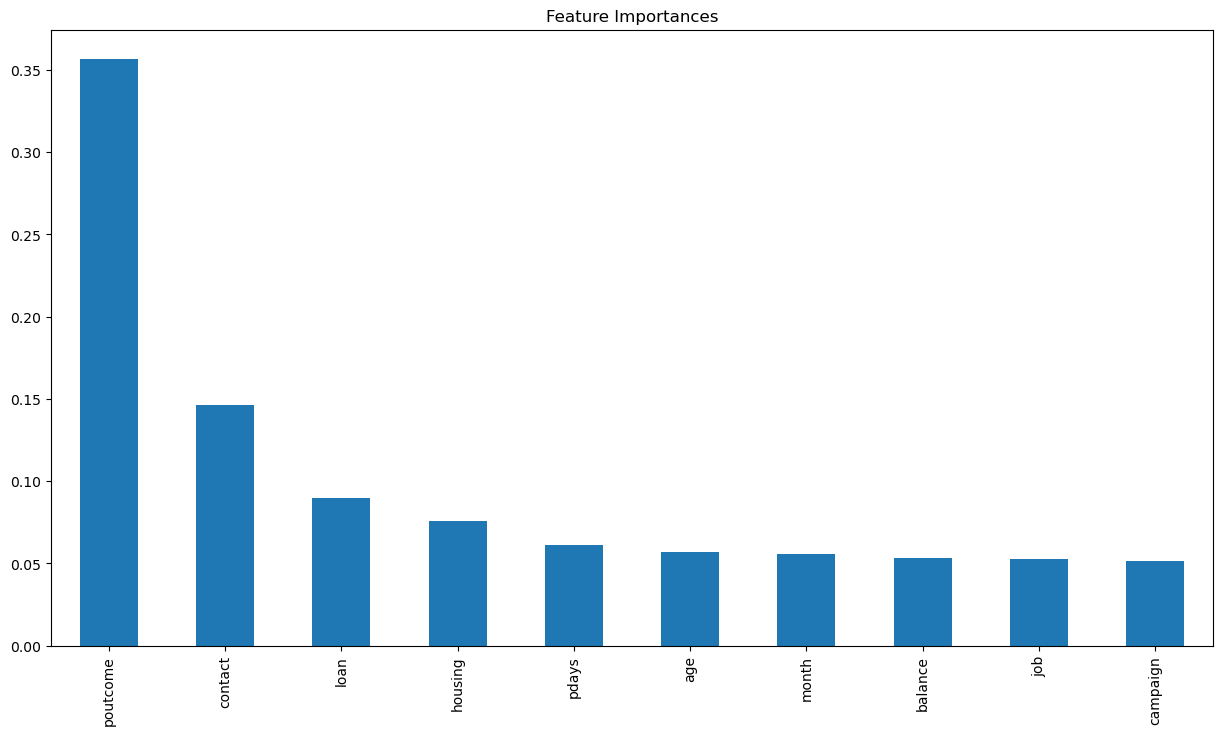

In [123]:
from sklearn.preprocessing import LabelEncoder

X_test_feat=X_test.copy()
categorical = X_test_feat.select_dtypes(include = "object").columns
X_test_feat[categorical] = X_test_feat[categorical].fillna(value='missing')
le = LabelEncoder()
X_test_feat[categorical] = X_test_feat[categorical].astype('string').apply(le.fit_transform)

xgb=XGBClassifier()
xgb.fit(X_test_feat,y_test)
xgb_coef1 = pd.Series(xgb.feature_importances_, X_test_feat.columns).sort_values(ascending = False)
plt.figure(figsize=(15,8))
xgb_coef1.iloc[:50].plot(kind='bar', title='Feature Importances')
plt.show()

dapat diliat features yang paling berpengaruh terhadap keputusan melakukan deposit ialah poutcame yang sukses(status keberhasilan kampanye pemasaran pada kampanye sebelumnya). salah satu keuntungan mengetahui feature importance ialah, jika running model terlalu berat salah satu opsi yang dapat dilakukan ialah menghapus feature2 yang tidak terlalu berpengaruh kepada keputusan deposit.

## Predict Data Test

In [198]:
df_test.head(10)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2266,32,management,-383,yes,no,unknown,may,1,-1,unknown,0
7393,37,services,608,no,no,cellular,may,3,-1,unknown,0
1541,31,admin.,-422,yes,no,cellular,may,2,329,other,0
1426,30,blue-collar,128,yes,no,unknown,may,1,-1,unknown,0
2454,56,management,7747,no,no,unknown,jun,2,-1,unknown,0
3118,35,technician,22,no,no,cellular,aug,1,-1,unknown,0
3500,33,admin.,30,yes,no,telephone,may,2,-1,unknown,0
2026,38,management,151,yes,no,cellular,jul,1,-1,unknown,0
7220,70,retired,6422,no,no,cellular,mar,1,-1,unknown,1
1744,36,management,8564,yes,no,unknown,may,1,-1,unknown,0


In [200]:
# Menghitung jumlah dan persentase pada kolom 'contact'
contact_stats = calculate_value_counts_and_percentages(df_test, 'contact')
pd.DataFrame(contact_stats)

,Jumlah,Persentase
contact,,
cellular,1119,71.59%
unknown,326,20.86%
telephone,118,7.55%


In [202]:
# Menghitung jumlah dan persentase pada kolom 'poutcome'
poutcome_stats = calculate_value_counts_and_percentages(df_test, 'poutcome')
pd.DataFrame(poutcome_stats)

,Jumlah,Persentase
poutcome,,
unknown,1169,74.79%
success,154,9.85%
failure,153,9.79%
other,87,5.57%


In [222]:
# Menghapus baris dengan nilai 'unknown' pada kolom 'job'
df_test = df.drop(df[df['job'] == 'unknown'].index)
pd.DataFrame(job_stats)

,Jumlah,Persentase
job,,
management,1432,22.91%
blue-collar,1100,17.6%
technician,1039,16.62%
admin.,768,12.29%
services,523,8.37%
retired,428,6.85%
self-employed,222,3.55%
unemployed,196,3.14%
student,192,3.07%


In [224]:
# Mengimputasi nilai 'unknown' pada kolom 'contact' dengan modus
mode_contact = df_test['contact'].mode()[0]
df_test['contact'] = df_test['contact'].replace('unknown', mode_contact)

pd.DataFrame(contact_stats)

,Jumlah,Persentase
contact,,
cellular,1119,71.59%
unknown,326,20.86%
telephone,118,7.55%


In [226]:
# menunjukan bahwa poutcome yang unknown merupakan pelanggan yang tidak dihubungi dalam kampanye sebelumnya (pdays = -1)

filtered_df = df_test[(df_test['poutcome'] != 'unknown') & (df_test['pdays'] == -1)]
pd.DataFrame(filtered_df[['poutcome', 'pdays']])

,poutcome,pdays


In [228]:
# Mengubah nilai "unknown" menjadi "not_contacted" pada kolom "poutcome"
df_test['poutcome'] = df_test['poutcome'].replace('unknown', 'not_contacted')
pd.DataFrame(poutcome_stats)

,Jumlah,Persentase
poutcome,,
unknown,1169,74.79%
success,154,9.85%
failure,153,9.79%
other,87,5.57%


In [230]:
# Memisahkan Target dengan Feature pada data train
X_test = df_test.drop(columns=['deposit'])
y_test = df_test['deposit']

In [234]:
y_pred=gridsearch.best_estimator_.predict(X_test)

In [236]:
# Extract and print the best parameters from the second tuning
best_refined_params = refined_gridsearch.best_params_
print(f"Best parameters from the second tuning: {best_refined_params}")

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)

Best parameters from the second tuning: {'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 150}
Accuracy: 69.82%
Precision: 70.00%
Recall: 69.82%
F1 Score: 69.83%
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      4053
           1       0.67      0.72      0.69      3706

    accuracy                           0.70      7759
   macro avg       0.70      0.70      0.70      7759
weighted avg       0.70      0.70      0.70      7759

Confusion Matrix:
[[2749 1304]
 [1038 2668]]


# Kesimpulan

 **Kesimpulan:**
 
Model Gradient Boosting dengan hyperparameter yang di-tuning memberikan performa terbaik secara seimbang antara precision dan recall.

Model cukup mampu mengenali nasabah yang potensial membuka deposito (recall kelas 1 = 64%).

Dapat digunakan untuk membantu tim pemasaran melakukan segmentasi lebih baik.

**📌 Model Prediktif Efektif Telah Dibuat**

Telah dikembangkan model klasifikasi menggunakan Gradient Boosting Classifier.

Model ini mampu memprediksi apakah seorang nasabah akan membuka deposito dengan:

- Accuracy: ~71.5%

- F1-Score (kelas positif): ~68%

- Recall (kelas positif): ~64%

Hasil ini menunjukkan model dapat mengenali sebagian besar nasabah yang potensial membuka deposito, meskipun data tidak seimbang.

**🎯 Model Membantu Menargetkan Nasabah Potensial**

Dengan menggunakan model ini, bank dapat menghindari pendekatan acak ke seluruh nasabah.

Bank dapat memfokuskan kampanye pada segmen nasabah yang paling mungkin membuka deposito, sehingga:

Biaya kampanye berkurang.

Efektivitas kampanye meningkat.

**💡 Fitur Penting yang Mempengaruhi Keputusan Nasabah**

Beberapa faktor yang paling berpengaruh dalam keputusan membuka deposito antara lain:

Hasil kontak kampanye sebelumnya

Status pekerjaan dan pendidikan

Jumlah saldo di rekening

Durasi dan frekuensi kontak

Informasi ini dapat dijadikan dasar dalam membuat strategi komunikasi yang lebih personal dan tepat sasaran.

# Rekomendasi

**1. 🎯 Terapkan Model untuk Menargetkan Nasabah Potensial**

Gunakan model klasifikasi yang telah dibangun untuk:

Mengklasifikasikan seluruh basis data nasabah bank.

Mengidentifikasi siapa yang memiliki probabilitas tinggi membuka deposito.

Fokuskan kampanye pemasaran hanya pada nasabah dengan skor tinggi → efisiensi biaya meningkat

**2. 📊 Segmentasi Nasabah Berdasarkan Fitur Penting**
Lakukan segmentasi berdasarkan fitur yang terbukti signifikan dalam model, seperti:

Hasil kampanye sebelumnya (poutcome)

Status pekerjaan (job)

Saldo rekening (balance)

Durasi dan jumlah kontak (duration, campaign)

→ Buat strategi komunikasi dan penawaran yang disesuaikan untuk tiap segmen agar lebih relevan dan meyakinkan.

In [248]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X_train = df_train.drop(columns=['deposit']) 
y_train = df_train['deposit']

# Fitting dengan data yang benar
refined_gridsearch.fit(X_train, y_train)

# Simpan model dengan pickle
pickle.dump(refined_gridsearch, open('best_model_capstone3_HenrikusEricSetiawan.sav', 'wb'))

In [252]:
# Load model
filename = 'best_model_capstone3_HenrikusEricSetiawan.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [254]:
loaded_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'campaign',
                                                                          'pdays']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['job',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome'])])),
                                       ('resampling', SMOTE(random_state=42)),
                                       ('model',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__max_depth': [2, 3, 4],
                         'model__n_estimators': [150, 200, 250]},
             scoring='f1')